<a href="https://colab.research.google.com/github/lguerraq/UTP-ML/blob/main/UTP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

import os

if(IS_LOCAL):
    PATH="/content/dataset"
else:
    PATH="/content/dataset"
print(os.listdir(PATH))

['creditcard.csv']


In [ ]:
data_df = pd.read_csv(PATH+"/creditcard.csv")

In [ ]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 118921  columns: 31


# Visualización de los datos

In [ ]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118921.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000,118920.000000
mean,47027.170054,-0.253918,-0.010410,0.679130,0.154837,-0.283692,0.090009,-0.114900,0.060152,-0.075959,-0.016671,0.225505,-0.021417,-0.010855,0.040341,0.203001,-0.002599,0.051409,-0.093156,-0.018694,0.043269,-0.035075,-0.113133,-0.035646,0.011230,0.131135,0.027362,0.000798,0.001922,94.481509,0.002060
std,18887.176901,1.838466,1.636283,1.294413,1.336118,1.331991,1.292646,1.192425,1.226151,1.096654,1.050713,1.056796,1.062757,1.018629,0.941505,0.931996,0.888056,0.910053,0.840274,0.812394,0.740780,0.732255,0.637798,0.613552,0.595023,0.439124,0.491152,0.395290,0.317835,256.248844,0.045343
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,35608.000000,-1.021676,-0.585565,0.174852,-0.705609,-0.904280,-0.652907,-0.602499,-0.133772,-0.706021,-0.483672,-0.540933,-0.428376,-0.681580,-0.343411,-0.345032,-0.472671,-0.406364,-0.562062,-0.510797,-0.168259,-0.225353,-0.540884,-0.174438,-0.324324,-0.133721,-0.323106,-0.060809,-0.004592,6.890000,0.000000
50%,48852.000000,-0.263647,0.088298,0.753834,0.182457,-0.316332,-0.162771,-0.067083,0.077871,-0.138456,-0.092512,0.145617,0.133732,-0.018517,0.065980,0.315802,0.077273,-0.010744,-0.088328,-0.021881,-0.024914,-0.058568,-0.091361,-0.047882,0.067509,0.168272,-0.064439,0.010841,0.023445,25.000000,0.000000
75%,62467.000000,1.155661,0.754145,1.374919,1.014245,0.242234,0.480686,0.411506,0.370273,0.509519,0.434933,1.042951,0.632629,0.657972,0.471368,0.876824,0.540574,0.446190,0.384351,0.478942,0.168226,0.117267,0.306466,0.082146,0.408446,0.419410,0.293266,0.084915,0.077187,85.000000,0.000000
max,75261.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


# Comprobación de Datos

In [ ]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,Time,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,V15
Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Desequilibrio de Datos

In [ ]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True),
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

# Exploración de Datos

## Transacciones en el tiempo

In [ ]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [ ]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0.0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1.0,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0.0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1.0,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0.0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


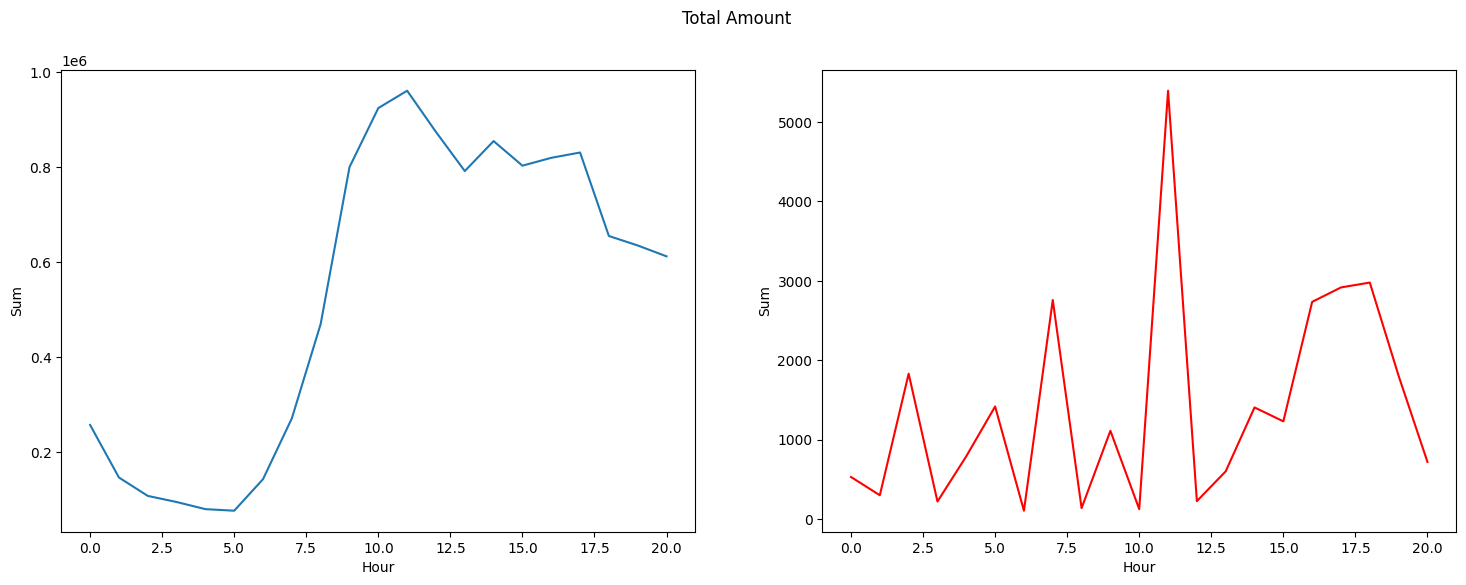

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

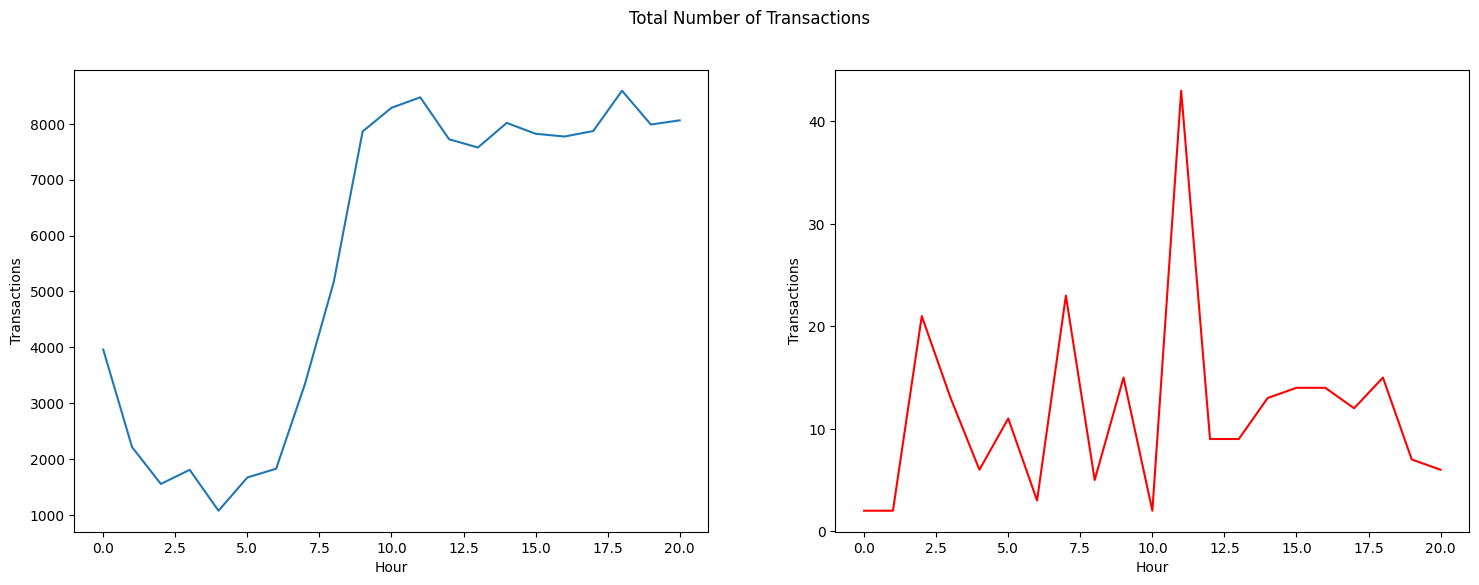

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

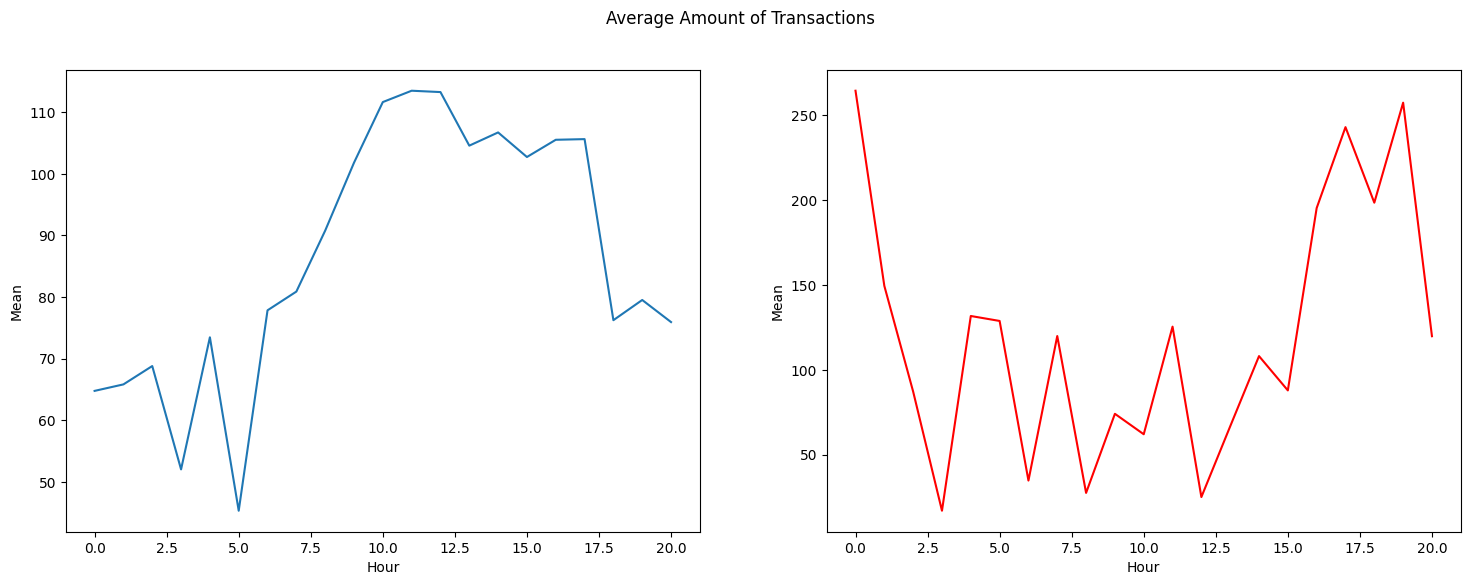

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

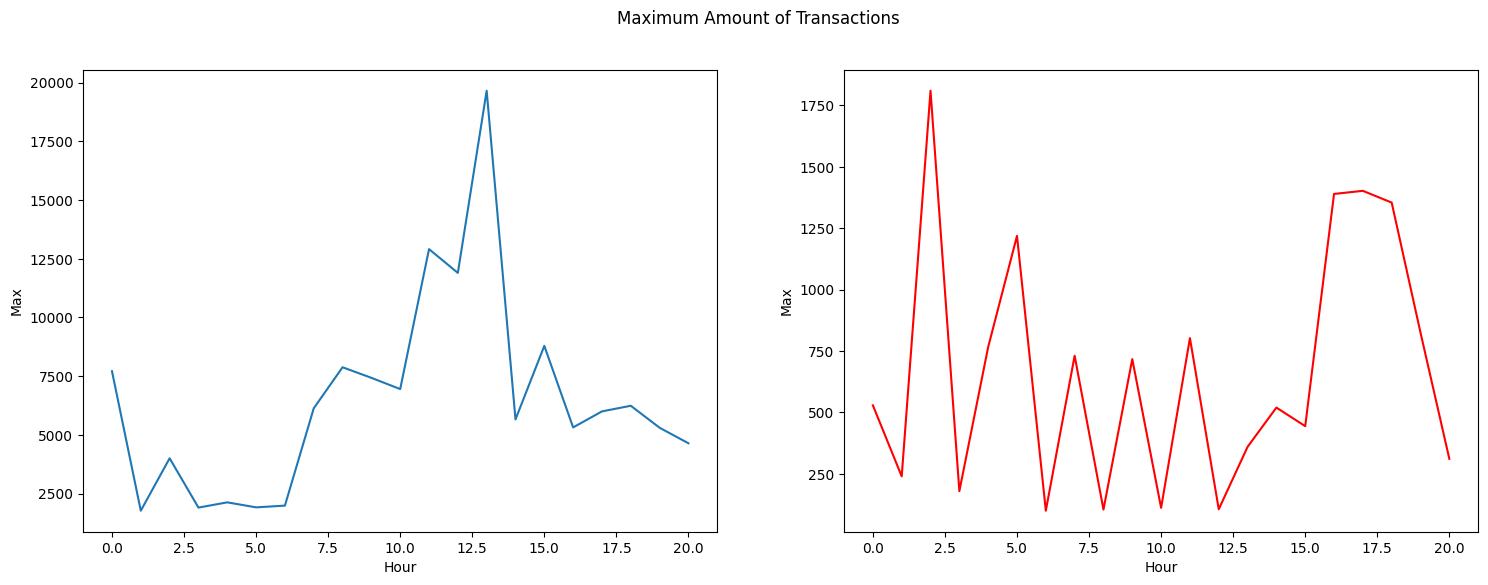

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

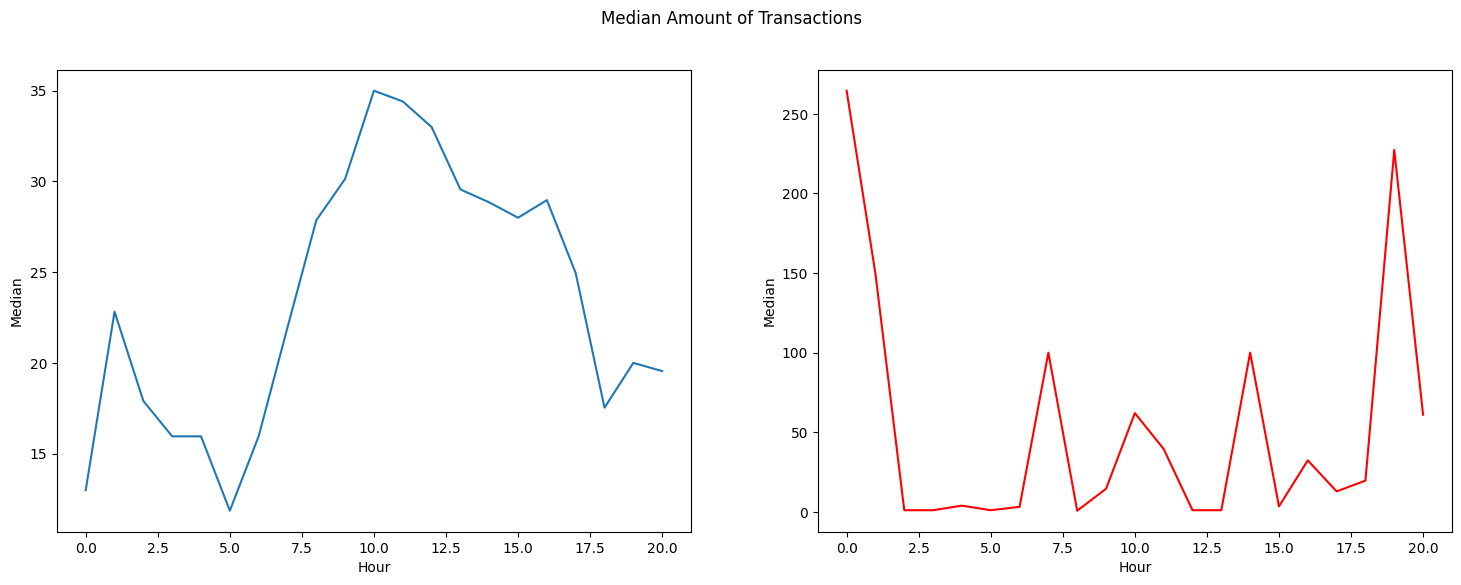

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

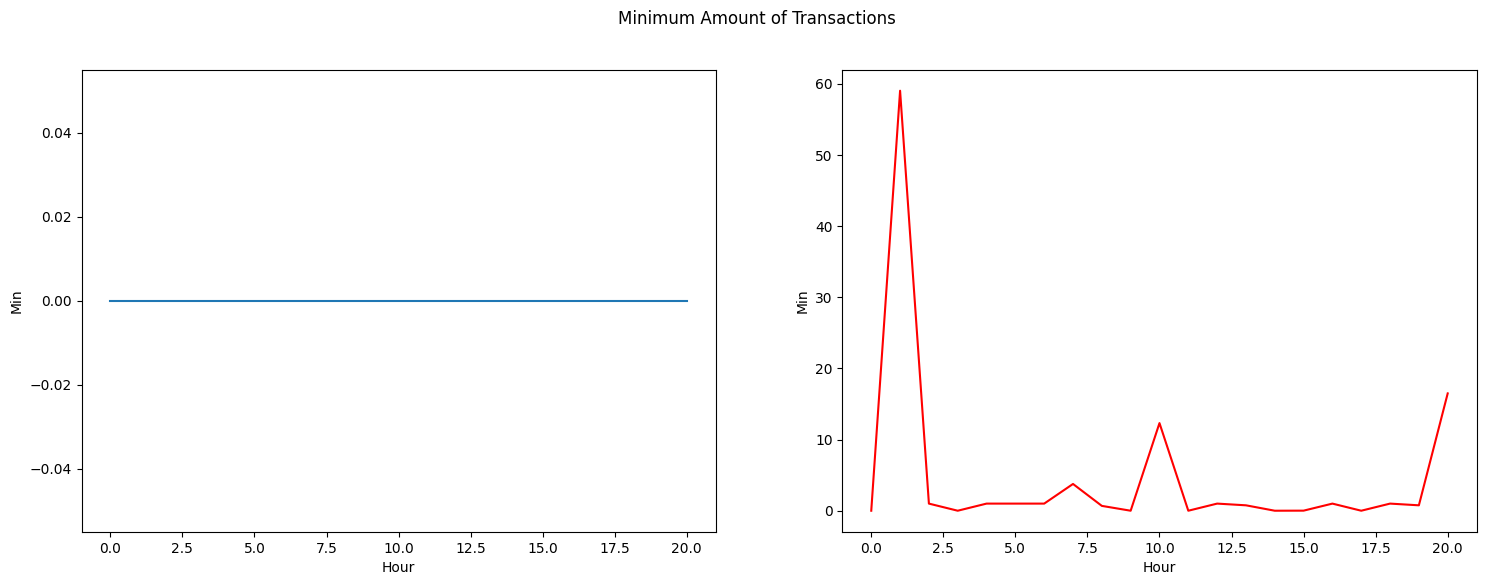

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

## Monto de las transacciones

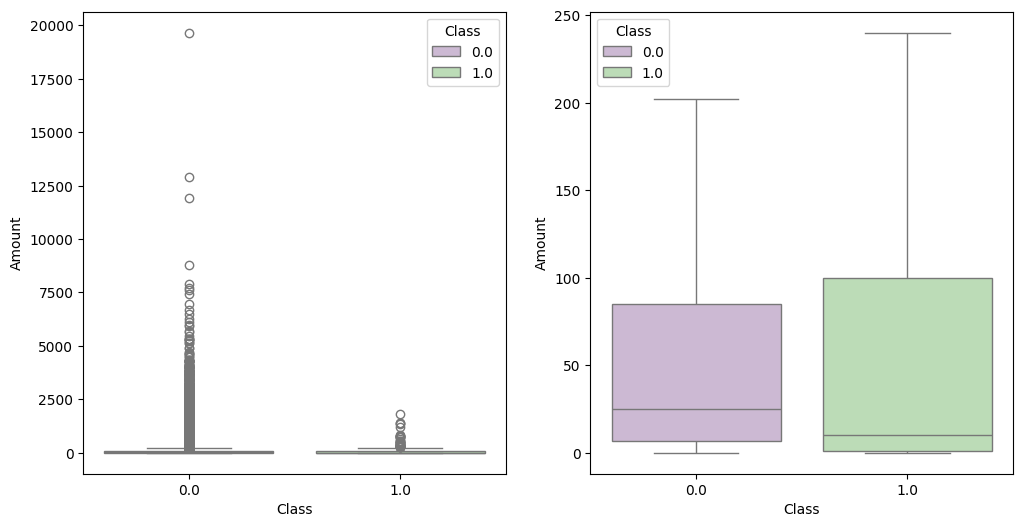

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [ ]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    118675.000000
mean         94.429486
std         256.253714
min           0.000000
25%           6.935000
50%          25.000000
75%          85.000000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
class_1.describe()

count     245.000000
mean      119.680449
std       253.139731
min         0.000000
25%         1.000000
50%         9.990000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True),
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

## Correlación de caracteristicas

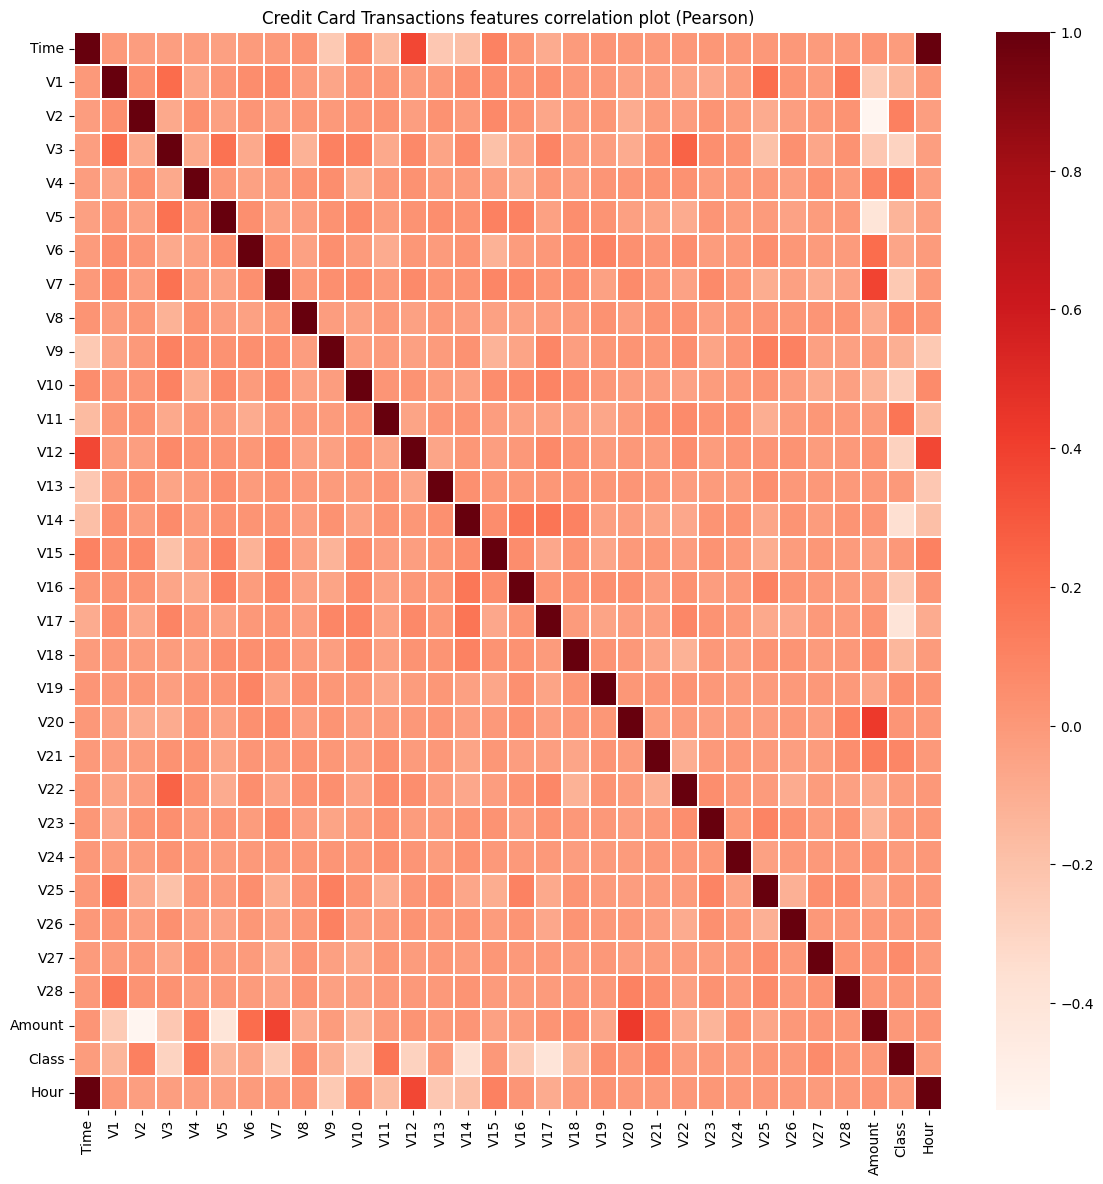

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

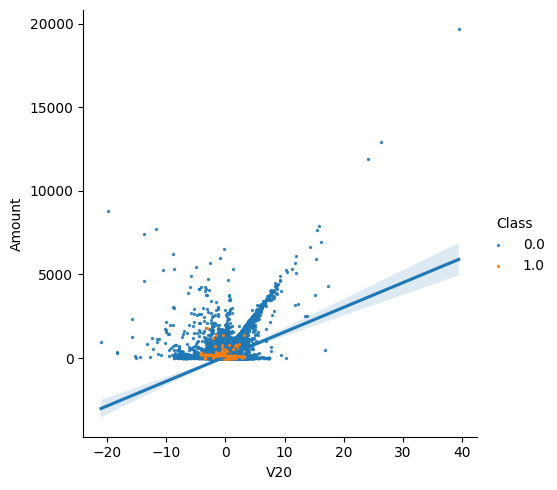

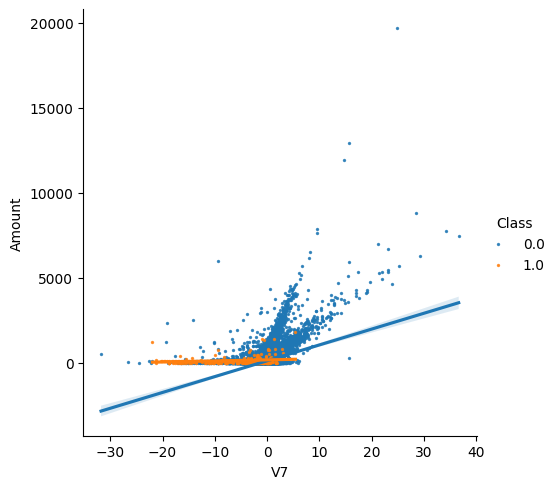

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

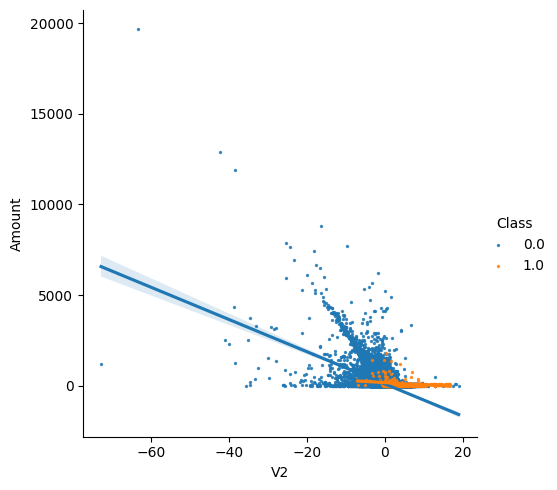

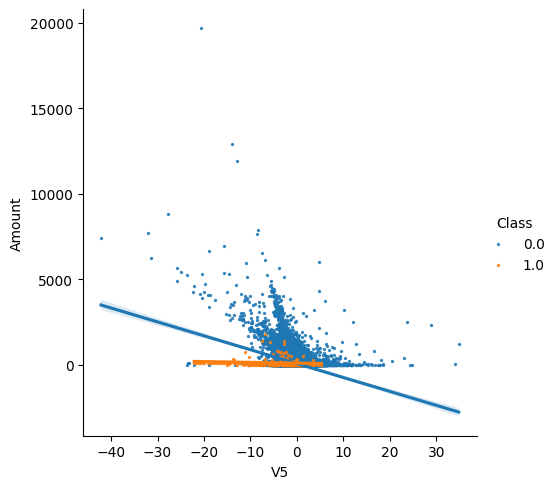

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

## Gráfico de densidad de características

<ipython-input-31-49894014f345>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-31-49894014f345>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-31-49894014f345>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-31-49894014f345>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameter

<Figure size 640x480 with 0 Axes>

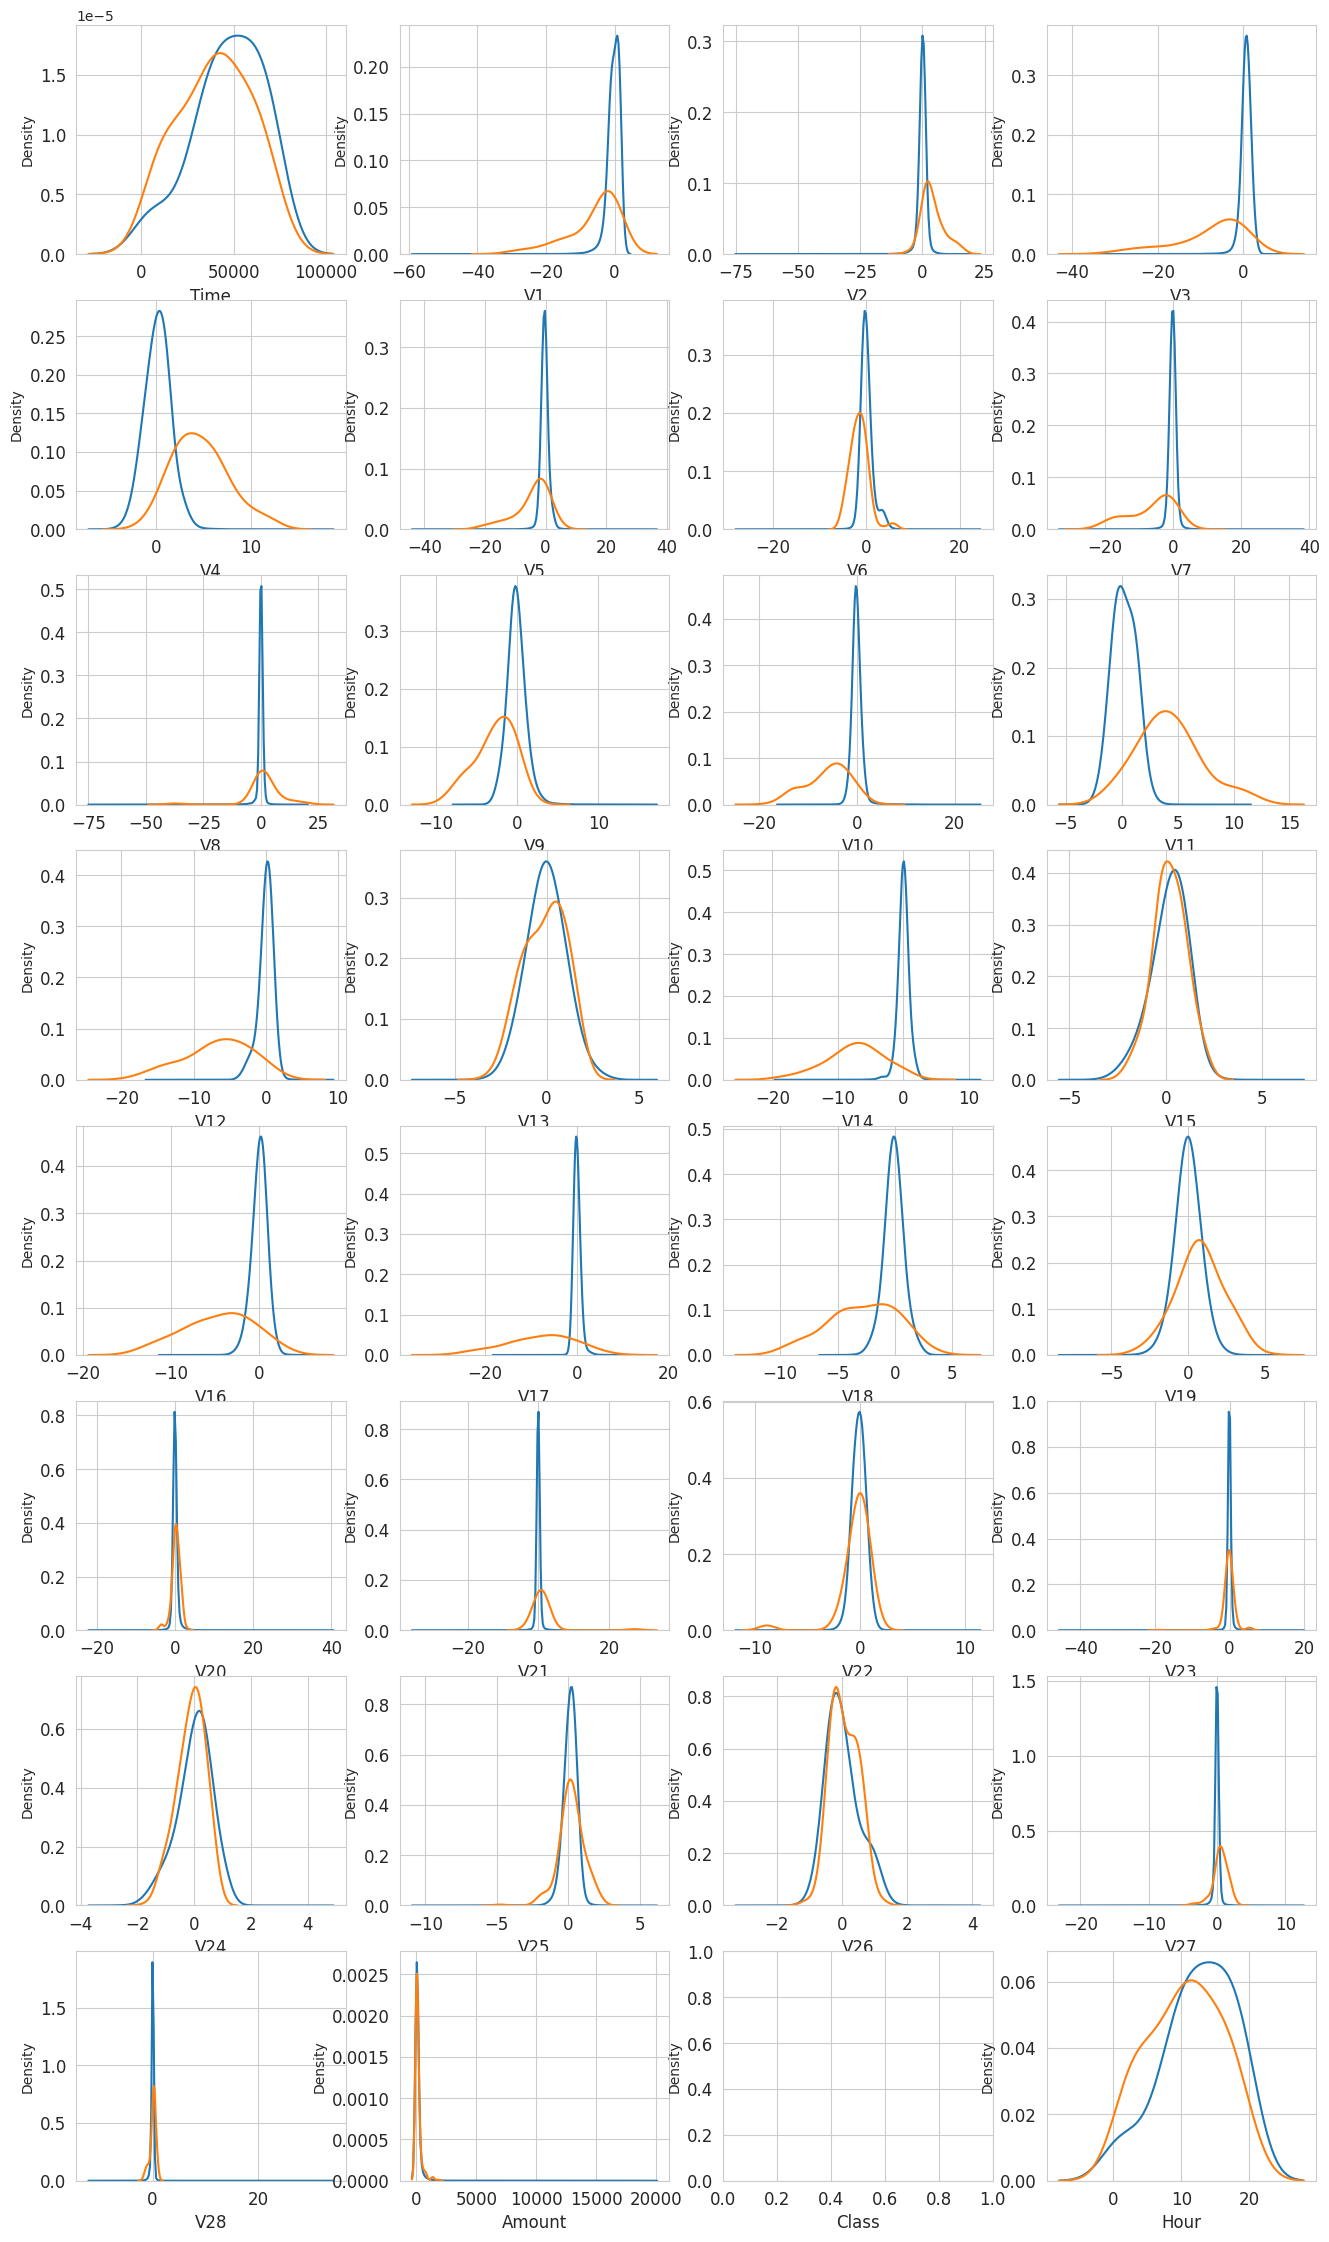

In [ ]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# Modelos Predictivos

### Definir predictores y valores objetivo

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### Dividir datos en el conjunto de tren, prueba y validación

In [ ]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

## RandomForestClassifier

### Definir los parámetros del modelo

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Create an imputer (replace 'mean' with your desired strategy)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform it
train_df[predictors] = imputer.fit_transform(train_df[predictors])

# Handle missing values in the target variable (e.g., remove rows with missing targets)
train_df.dropna(subset=[target], inplace=True)  # Remove rows with NaN in 'Class'

# Now fit your classifier
clf = RandomForestClassifier(n_jobs=NO_JOBS, random_state=RANDOM_STATE, criterion=RFC_METRIC, n_estimators=NUM_ESTIMATORS, verbose=False)
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [ ]:
preds = clf.predict(valid_df[predictors])

### Importancia de las características

<ipython-input-49-34030293d53b>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



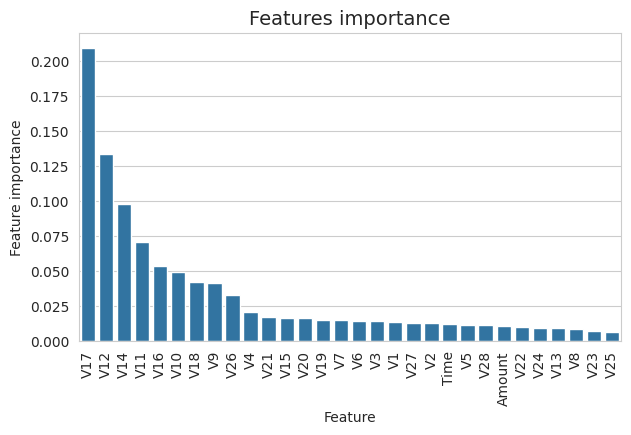

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


### Matriz de confusión

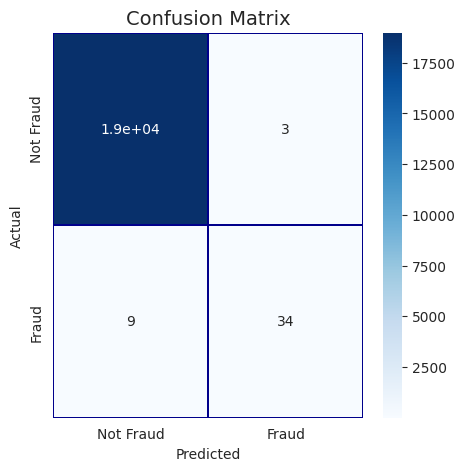

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Área bajo la curva

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8952698274647672

## AdaBoostClassifier

### Preparar el modelo

In [ ]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME.R', learning_rate=0.8, n_estimators=NUM_ESTIMATORS)

### Entrenar el modelo

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

### Predecir los valores objetivo

In [ ]:
preds = clf.predict(valid_df[predictors])

### Importancia de las características

<ipython-input-55-34030293d53b>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



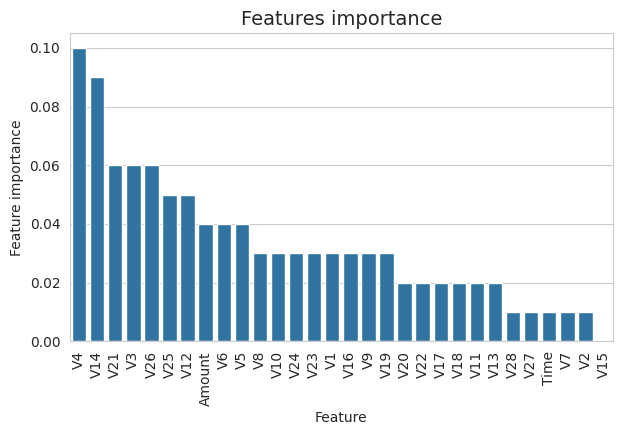

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Matriz de confusión

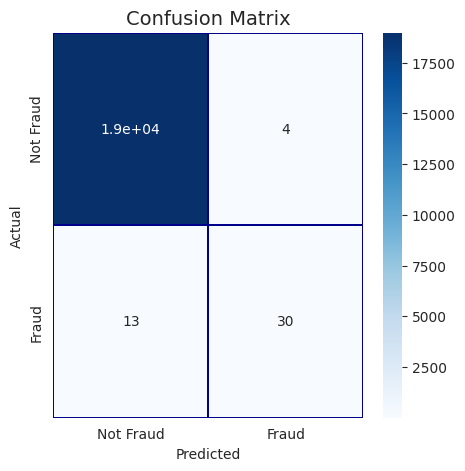

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Área bajo la curva

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8487318629762787

## CatBoostClassifier

### Preparar el modelo

In [ ]:
clf = CatBoostClassifier(iterations=500, learning_rate=0.02, depth=12, eval_metric='AUC', random_seed = RANDOM_STATE, bagging_temperature = 0.2, od_type='Iter', metric_period = VERBOSE_EVAL, od_wait=100)

In [ ]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 816ms	remaining: 6m 47s
50:	total: 29.9s	remaining: 4m 23s
100:	total: 56.8s	remaining: 3m 44s
150:	total: 1m 23s	remaining: 3m 13s
200:	total: 1m 51s	remaining: 2m 45s
250:	total: 2m 16s	remaining: 2m 15s
300:	total: 2m 44s	remaining: 1m 48s
350:	total: 3m 15s	remaining: 1m 23s
400:	total: 3m 43s	remaining: 55.1s
450:	total: 4m 10s	remaining: 27.2s
499:	total: 4m 34s	remaining: 0us


### Predecir los valores objetivo

In [ ]:
preds = clf.predict(valid_df[predictors])

### Importancia de las características

<ipython-input-61-34030293d53b>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



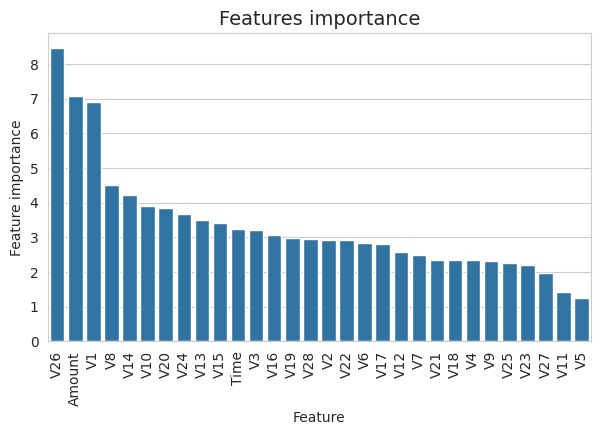

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Matriz de confusión

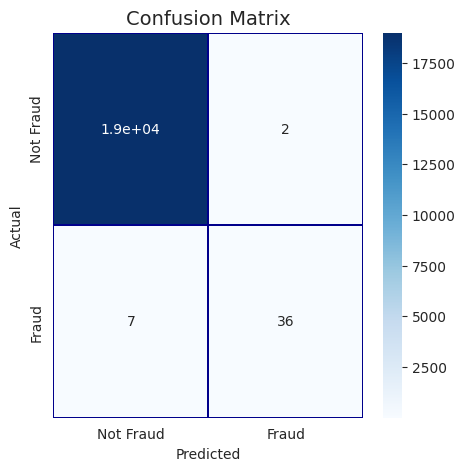

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Área bajo la curva

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.9185519779997673

## XGBoost

### Prepare the model

In [ ]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

### Entrenar el modelo

In [ ]:
model = xgb.train(params, dtrain, MAX_ROUNDS, watchlist, early_stopping_rounds=EARLY_STOP, maximize=True, verbose_eval=VERBOSE_EVAL)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning:

Pass `evals` as keyword args.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:48:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.




[0]	train-auc:0.92945	valid-auc:0.91796
[50]	train-auc:0.93238	valid-auc:0.91755
[100]	train-auc:0.97734	valid-auc:0.92788
[150]	train-auc:0.98955	valid-auc:0.95807
[200]	train-auc:0.99493	valid-auc:0.97012
[250]	train-auc:0.99721	valid-auc:0.97219
[300]	train-auc:0.99807	valid-auc:0.97471
[350]	train-auc:0.99869	valid-auc:0.97551
[400]	train-auc:0.99907	valid-auc:0.97652
[429]	train-auc:0.99923	valid-auc:0.97713


### Trazar la importancia de la variable

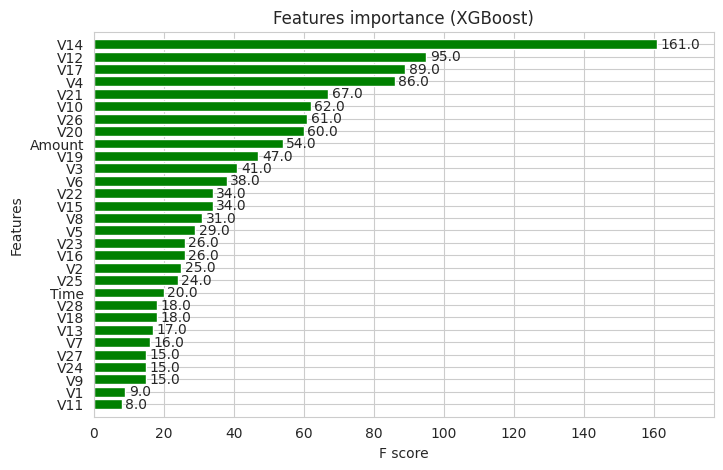

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

### Predecir conjunto de pruebas

In [ ]:
preds = model.predict(dtest)

### Área bajo la curva

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.9790667415519985

## LightGBM

### Definir los parámetros del modelo.

In [ ]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }

### Preparar el modelo

In [ ]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

### Ejecute el modelo

In [ ]:
# Assuming you want to use LightGBM
import lightgbm as lgb

evals_results = {}

# Use lgb.train, not xgb.train
model = lgb.train(params,
                 dtrain,
                 valid_sets=[dtrain, dvalid],
                 valid_names=['train','valid'],
                 num_boost_round=MAX_ROUNDS,
                 callbacks=[lgb.record_evaluation(evals_results),
                            lgb.early_stopping(stopping_rounds=EARLY_STOP)]) # Remove verbose_eval

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	train's auc: 0.97973	valid's auc: 0.951361


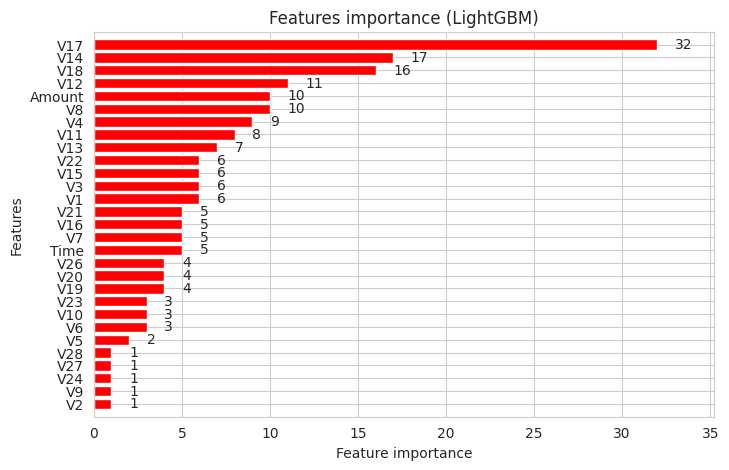

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")
plt.show()

### Predecir datos de prueba

In [ ]:
preds = model.predict(test_df[predictors])

### Área bajo la curva

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.9357324721520173

### Entrenamiento y validación mediante validación cruzada

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import gc

# ... (Your existing code)

kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]

    evals_results = {}
    model =  lgb.LGBMClassifier( # Use lgb prefix for LGBMClassifier
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  # Use 'verbose' instead of 'verbosity'
                  verbose=-1,
                  feval=None)

    model.fit(train_x, train_y,
          eval_set=[(train_x, train_y), (valid_x, valid_y)],
          eval_metric= 'auc',
          callbacks=[lgb.early_stopping(EARLY_STOP)] # Pass early stopping as a callback
         )


    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    # Use model.feature_importances_ instead of clf.feature_importances_
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = n_fold + 1

    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[155]	training's auc: 0.964448	valid_1's auc: 0.990078
Fold  1 AUC : 0.990078
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	training's auc: 0.971175	valid_1's auc: 0.964406
Fold  2 AUC : 0.964406
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	training's auc: 0.980116	valid_1's auc: 0.97438
Fold  3 AUC : 0.974380
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	training's auc: 0.983386	valid_1's auc: 0.974913
Fold  4 AUC : 0.974913
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	training's auc: 0.97699	valid_1's auc: 0.992418
Fold  5 AUC : 0.992418
Full AUC score 0.964602


In [ ]:
pred = test_preds